# **1. Introduction of Dataset**

1. **Source of Dataset**: 
This dataset is obtained from [Kaggle](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data).  

2. **About Dataset**: 
The dataset contains 2512 samples of transaction data, including transaction attributes. For example: customer demographics and usage patterns. Each data offers insights into transaction behavior for analysing financial security and fraud detection applications. 

3. **Key Features** 
Key Features:
- TransactionID: Unique alphanumeric identifier for each transaction.
- AccountID: Unique identifier for each account, with multiple transactions per account.
- TransactionAmount: Monetary value of each transaction, ranging from small everyday expenses to larger purchases.
- TransactionDate: Timestamp of each transaction, capturing date and time.
- TransactionType: Categorical field indicating 'Credit' or 'Debit' transactions.
- Location: Geographic location of the transaction, represented by U.S. city names.
- DeviceID: Alphanumeric identifier for devices used to perform the transaction.
- IP Address: IPv4 address associated with the transaction, with occasional changes for some accounts.
- MerchantID: Unique identifier for merchants, showing preferred and outlier merchants for each account.
- AccountBalance: Balance in the account post-transaction, with logical correlations based on transaction type and amount.
- PreviousTransactionDate: Timestamp of the last transaction for the account, aiding in calculating transaction frequency.
- Channel: Channel through which the transaction was performed (e.g., Online, ATM, Branch).
- CustomerAge: Age of the account holder, with logical groupings based on occupation.
- CustomerOccupation: Occupation of the account holder (e.g., Doctor, Engineer, Student, Retired), reflecting income patterns.
- TransactionDuration: Duration of the transaction in seconds, varying by transaction type.
- LoginAttempts: Number of login attempts before the transaction, with higher values indicating potential anomalies.

# **2. Import Library**

In this step, I import several Python libraries required for data analysis and machine learning model development.

In [1]:
import pandas as pd  # Import pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Import matplotlib for graph visualization
from yellowbrick.cluster import KElbowVisualizer  # Import KElbowVisualizer for Elbow method visualization
import seaborn as sns # Import seaborn for create more complex plot statistic
import numpy as np # Import numpy for complex numerical computing
from sklearn.preprocessing import StandardScaler  # For Standardization
from sklearn.preprocessing import LabelEncoder # For convert Categorical data
from sklearn.cluster import KMeans, DBSCAN  # Import KMeans and DBSCAN algorithms for clustering
from sklearn.metrics import silhouette_score  # Import silhouette_score to evaluate clustering results
from sklearn.feature_selection import RFE # Import Recursive Feature Elimination for feature selection
from sklearn.linear_model import LogisticRegression # Import Logistic Regression for feature selection
from sklearn.decomposition import PCA # Import PCA for visualization clustering result

# **3. Load Dataset**

Load dataset from Kaggle

In [2]:
# Read dataset from initial data and show 5 first rows data.
df = pd.read_csv('bank_transactions_data_init.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**
In this step, I perform exploratory data analysis to understand the dataset better. I will analyze the dataset's structure, check for missing values, and visualize the data distribution.

In [3]:
#Show Information about dataset, including total entries, column, data type, and total non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
# Display descriptive statistics for numerical columns in the dataset
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX000001,AC00362,NaN,2023-04-11 16:29:14,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


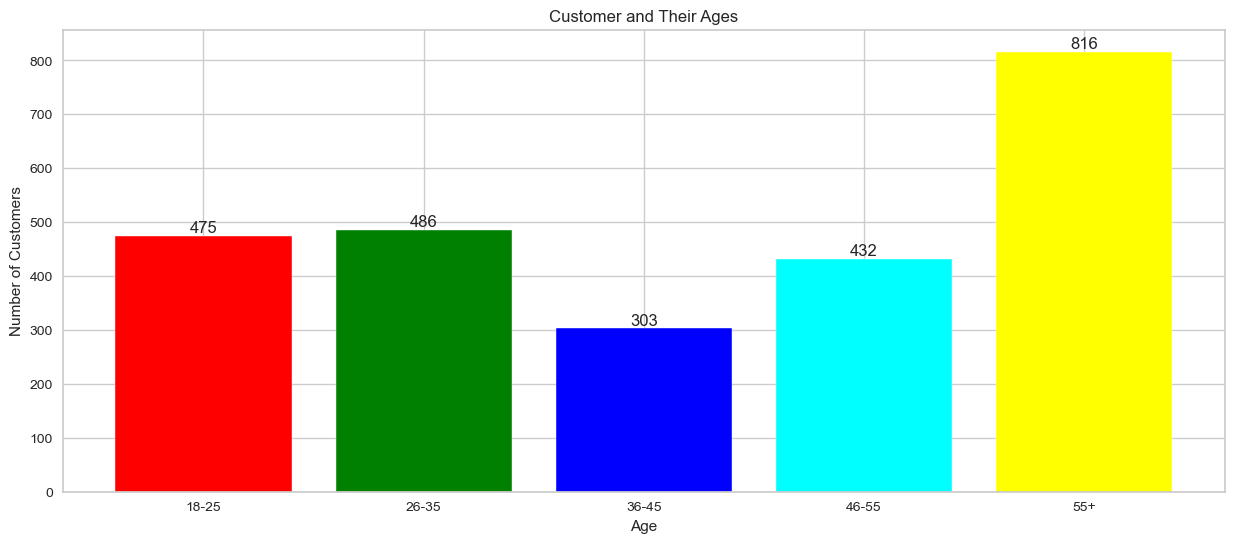

In [5]:
# Grouping customer age using binning
age18_25 = df.CustomerAge[(df.CustomerAge >= 18) & (df.CustomerAge <= 25)]
age26_35 = df.CustomerAge[(df.CustomerAge >= 26) & (df.CustomerAge <= 35)]
age36_45 = df.CustomerAge[(df.CustomerAge >= 36) & (df.CustomerAge <= 45)]
age46_55 = df.CustomerAge[(df.CustomerAge >= 46) & (df.CustomerAge <= 55)]
age55above = df.CustomerAge[df.CustomerAge >= 56]

# Set data for plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]
 
# Create bar chart for age distribution
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers") 

# Add label
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
 
plt.show()

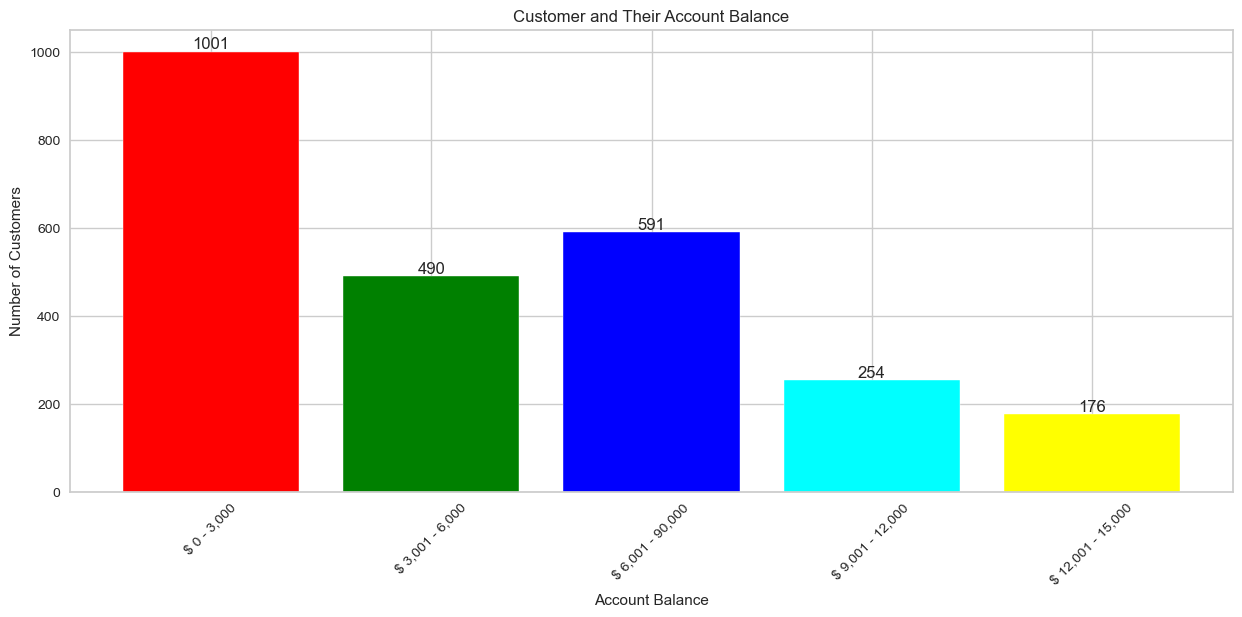

In [6]:
# Grouping customer account balance
ai0_3000 = df['AccountBalance'][(df["AccountBalance"] >= 0) & (df["AccountBalance"] <= 3000)]
ai3001_6000 = df["AccountBalance"][(df["AccountBalance"] >= 3001) & (df["AccountBalance"] <= 6000)]
ai6001_9000 = df["AccountBalance"][(df["AccountBalance"] >= 6001) & (df["AccountBalance"] <= 9000)]
ai9001_12000 = df["AccountBalance"][(df["AccountBalance"] >= 9001) & (df["AccountBalance"] <= 12000)]
ai12001_15000 = df["AccountBalance"][(df["AccountBalance"] >= 12001) & (df["AccountBalance"] <= 15000)]

# Setting data for plotting
aix = ["$ 0 - 3,000", "$ 3,001 - 6,000", "$ 6,001 - 90,000", "$ 9,001 - 12,000", "$ 12,001 - 15,000"]
aiy = [len(ai0_3000.values), len(ai3001_6000.values), len(ai6001_9000.values), len(ai9001_12000.values), len(ai12001_15000.values)]
 
# Create bar chart for distribution account balance
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Account Balance")
plt.xlabel("Account Balance")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  # Rotate x for easy to read
 
# Add label total customer
for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')
 
plt.show()

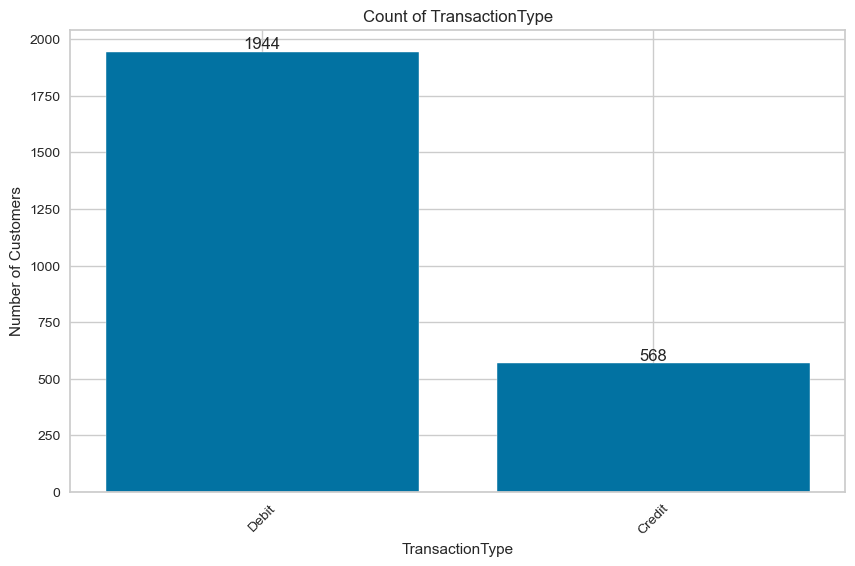

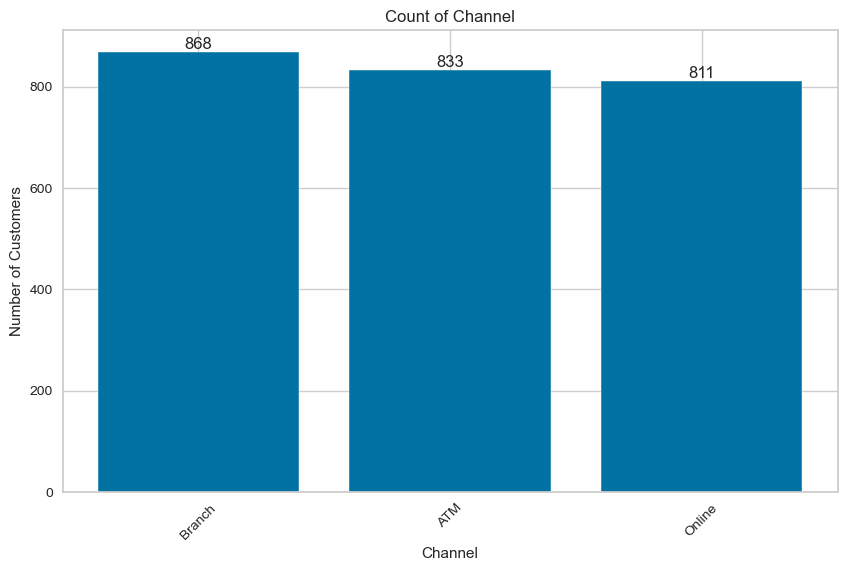

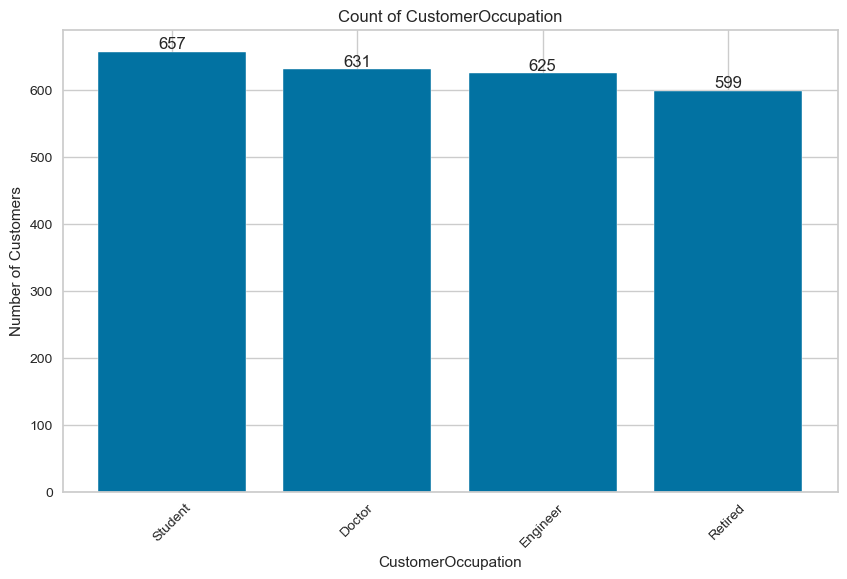

In [7]:
# Grouping customer based on categorical variable
categorical_vars = ['TransactionType', 'Channel', 'CustomerOccupation']

for var in categorical_vars:
    counts = df[var].value_counts()
    categories = counts.index.tolist()
    number_of_customers = counts.values.tolist()
    
    # Create figure for bar chart
    plt.figure(figsize=(10, 6))
    
    # Plot bar chart
    plt.bar(categories, number_of_customers)
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    
    # Show value in top of bar chart
    for i, freq in enumerate(number_of_customers):
        plt.text(i, freq, str(freq), ha='center', va='bottom')
    
    plt.show()


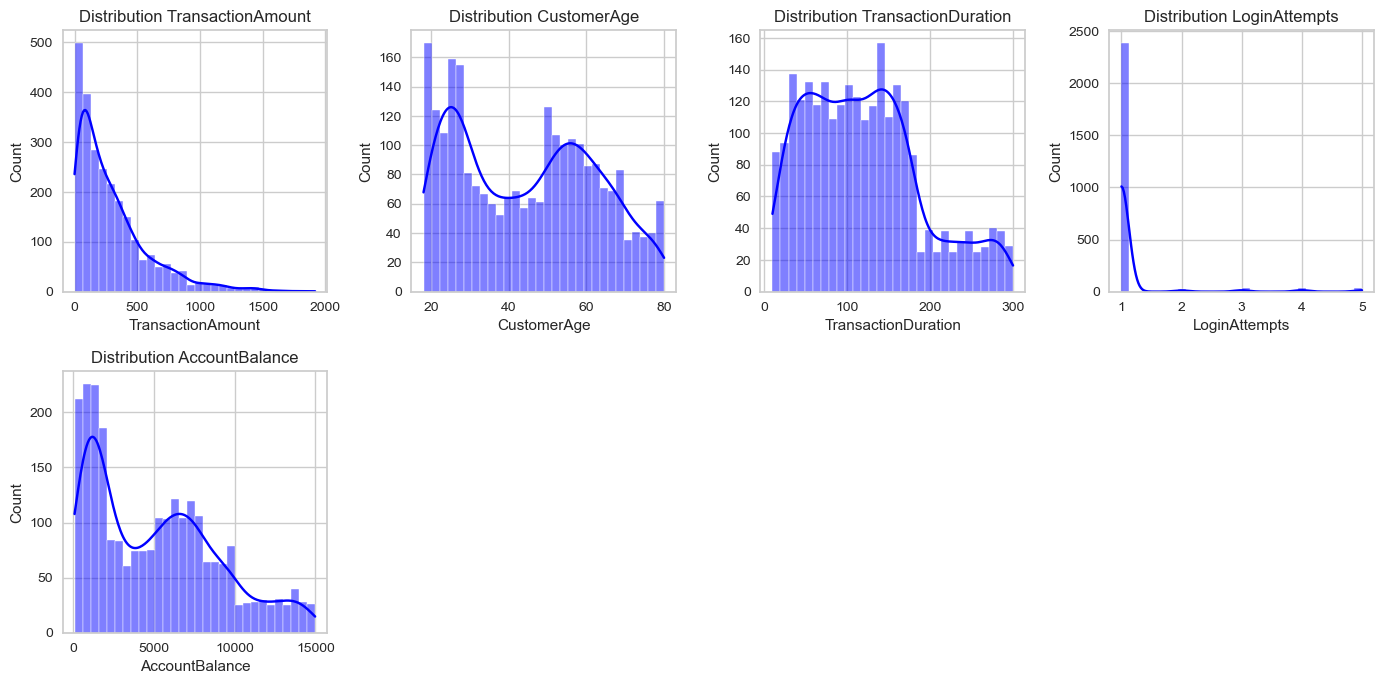

In [8]:
# Distribution for numerical features
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribution {column}')
plt.tight_layout()
plt.show()

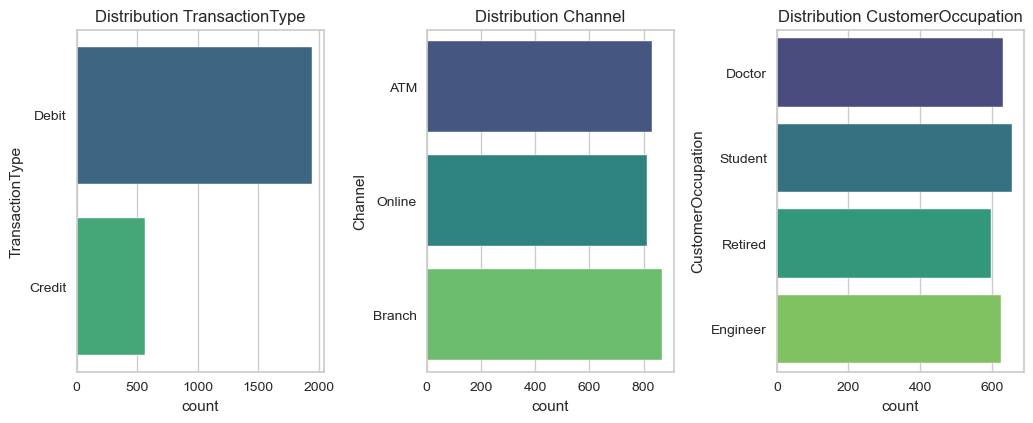

In [9]:
# Selected distribution from categorical features
plt.figure(figsize=(14, 8))
for i, column in enumerate(categorical_vars, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[column], hue=df[column], palette='viridis', legend=False)
    plt.title(f'Distribution {column}')
plt.tight_layout()
plt.show()

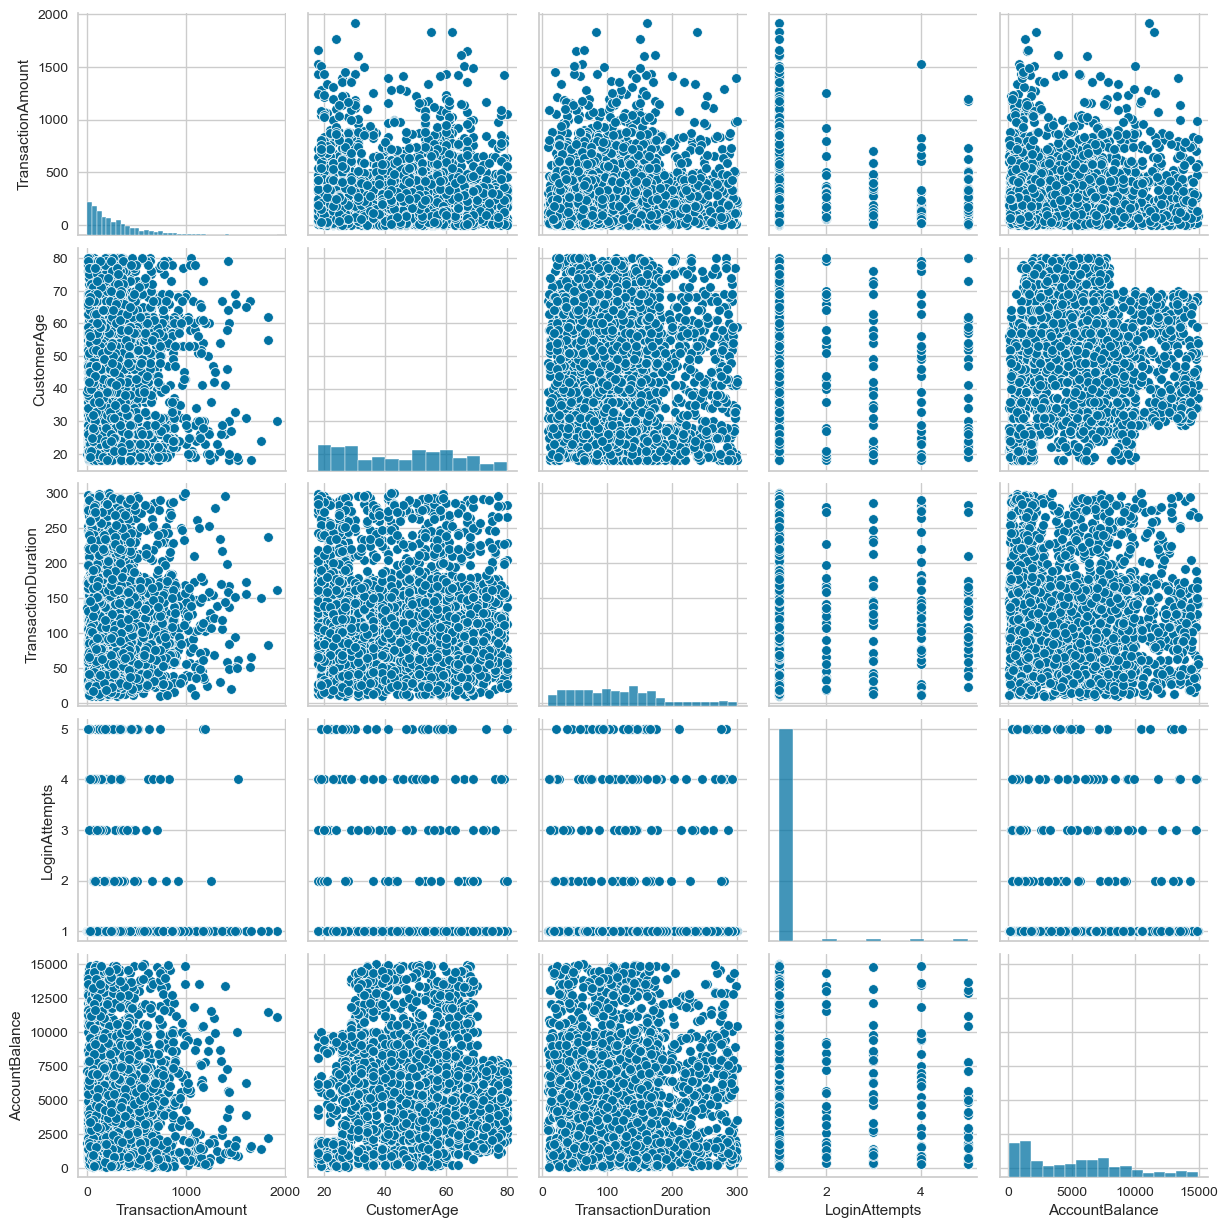

In [10]:
# Pairplot for numerical features
sns.pairplot(num_features)
plt.show()

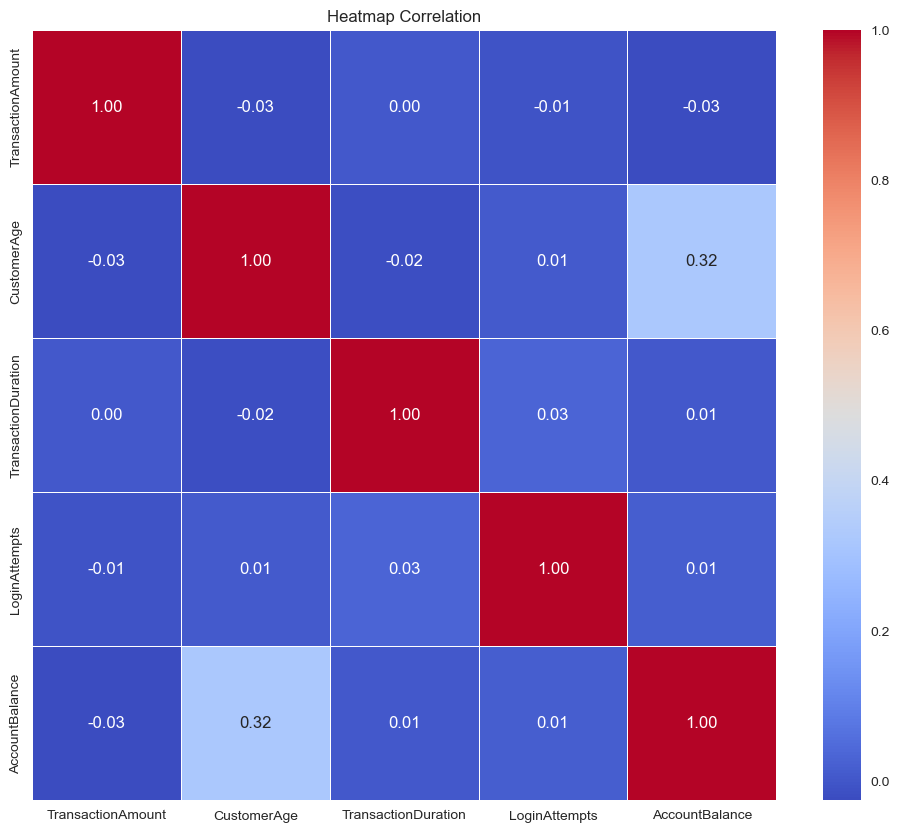

In [11]:
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Correlation')
plt.show()

# **5. Data Preprocessing**
In this step, I preprocess the data to prepare it for clustering. I will convert categorical data into numerical data, standardize the numerical data, and handle the outlier data.

In [12]:
# Copy df for preprocessing
df_preprocessed = df.copy()
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [13]:
# Check for duplicates
duplicates = df_preprocessed.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for missing values
missing_values = df_preprocessed.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Number of duplicate rows: 0
Missing values in each column:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [14]:
# Convert from object to date time
needed_to_convert = ['TransactionDate', 'PreviousTransactionDate']
for col in needed_to_convert: 
    df_preprocessed[col] = pd.to_datetime(df_preprocessed[col])

df_preprocessed.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [15]:
#  Drop unused columns
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'LoginAttempts']
df_preprocessed.drop(columns=columns_to_drop, inplace=True)
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2512 non-null   float64       
 1   TransactionDate          2512 non-null   datetime64[ns]
 2   TransactionType          2512 non-null   object        
 3   Location                 2512 non-null   object        
 4   Channel                  2512 non-null   object        
 5   CustomerAge              2512 non-null   int64         
 6   CustomerOccupation       2512 non-null   object        
 7   TransactionDuration      2512 non-null   int64         
 8   AccountBalance           2512 non-null   float64       
 9   PreviousTransactionDate  2512 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 196.4+ KB


In [16]:
# Add column days between last transaction
df_preprocessed["DaysBetweenTransaction"] = (df_preprocessed["PreviousTransactionDate"] - df_preprocessed["TransactionDate"]).dt.days

df_preprocessed.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,PreviousTransactionDate,DaysBetweenTransaction
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81,5112.21,2024-11-04 08:08:08,572
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141,13758.91,2024-11-04 08:09:35,495
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56,1122.35,2024-11-04 08:07:04,482
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25,8569.06,2024-11-04 08:09:06,548
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198,7429.40,2024-11-04 08:06:39,384


In [17]:
# Get all numeric features
numeric_features = df_preprocessed.select_dtypes(include=['number']).columns
print(numeric_features)

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'AccountBalance', 'DaysBetweenTransaction'],
      dtype='object')


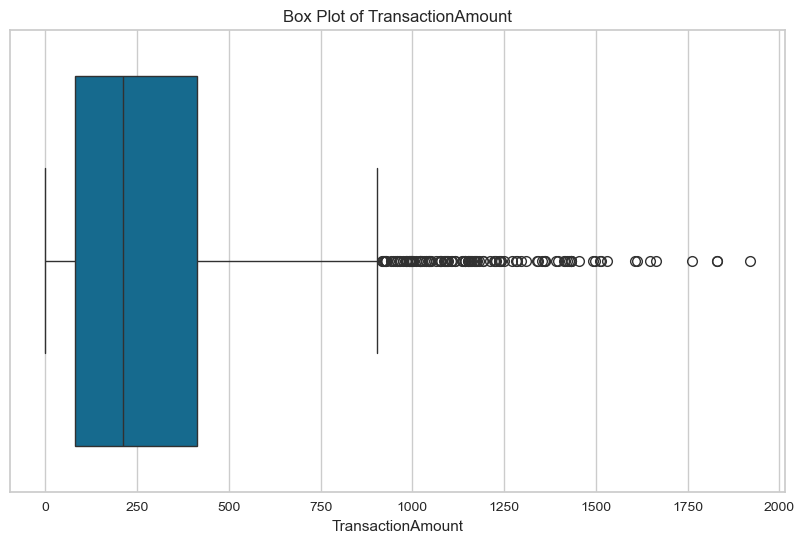

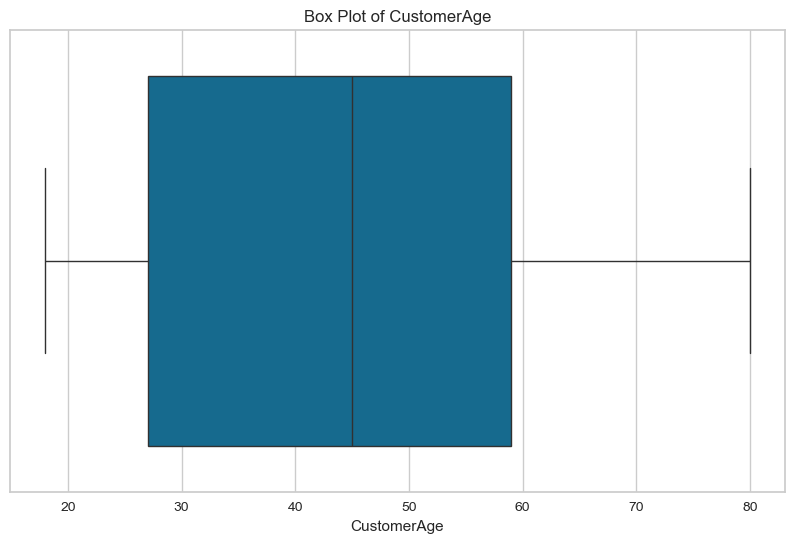

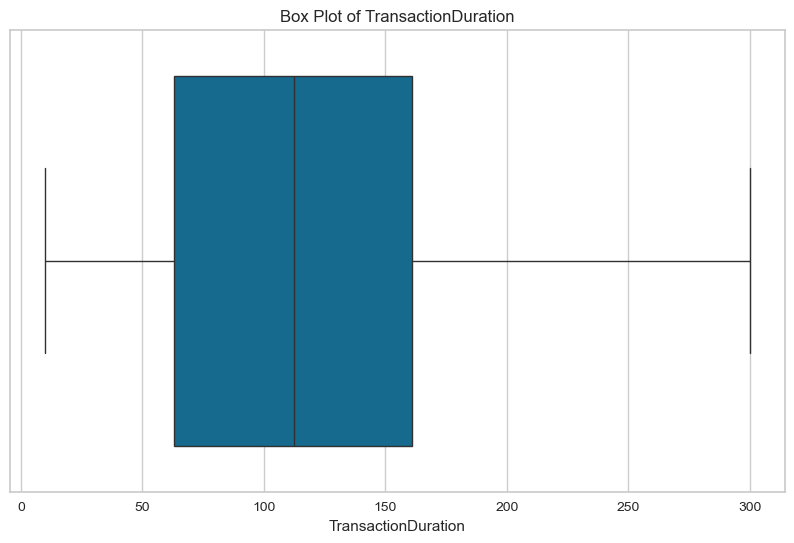

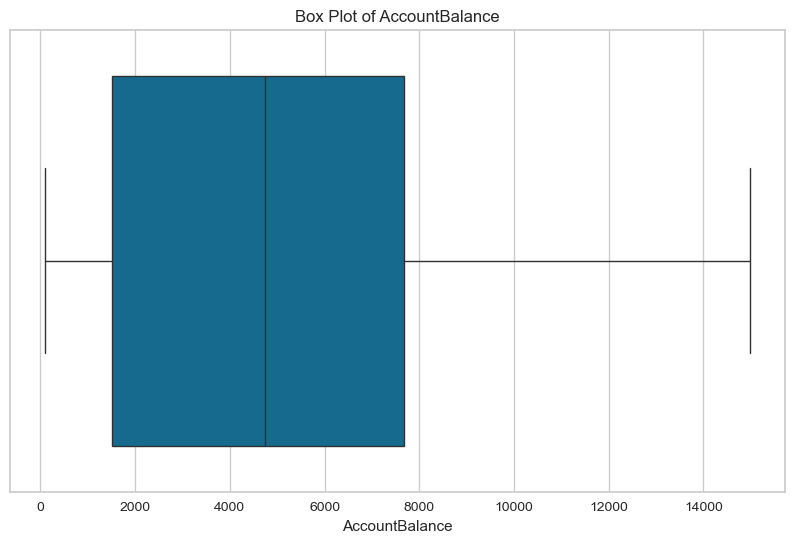

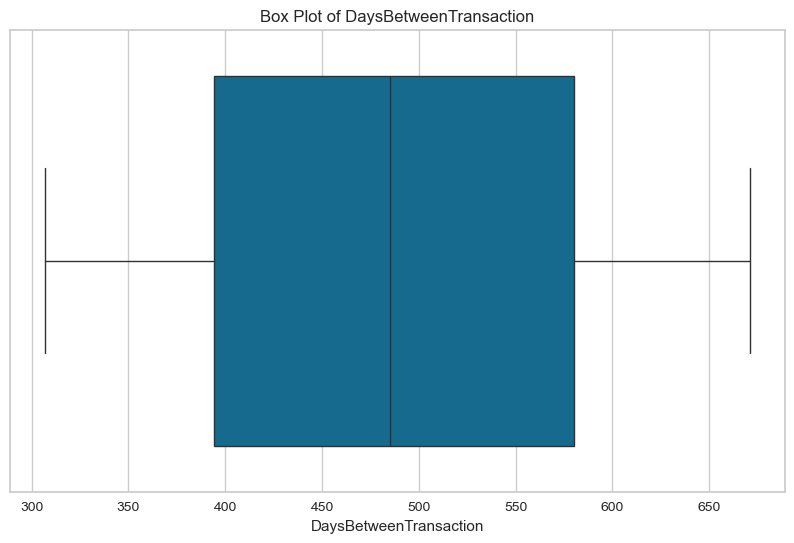

In [18]:
# Make plot for detection outliers
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_preprocessed[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [19]:
# Handle outliers 
for feature in numeric_features:
    Q1 = df_preprocessed[feature].quantile(0.25)
    Q3 = df_preprocessed[feature].quantile(0.75)
    IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR
    
    if feature not in ['TransactionAmount', 'AccountBalance']: # Let Outliers in TransactionAmount and AccountBalance
        # Filter dataframe        
        condition = ~((df_preprocessed[numeric_features] < (Q1 - 1.5 * IQR)) | (df_preprocessed[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
        df_preprocessed_filtered_numeric = df_preprocessed.loc[condition, numeric_features]
    # else:
    #     df_preprocessed[feature] = df[feature].apply(lambda x: (Q1 - 1.5 * IQR) if x < lower_bound else (Q3 + 1.5 * IQR) if x > (Q3 + 1.5 * IQR) else x)

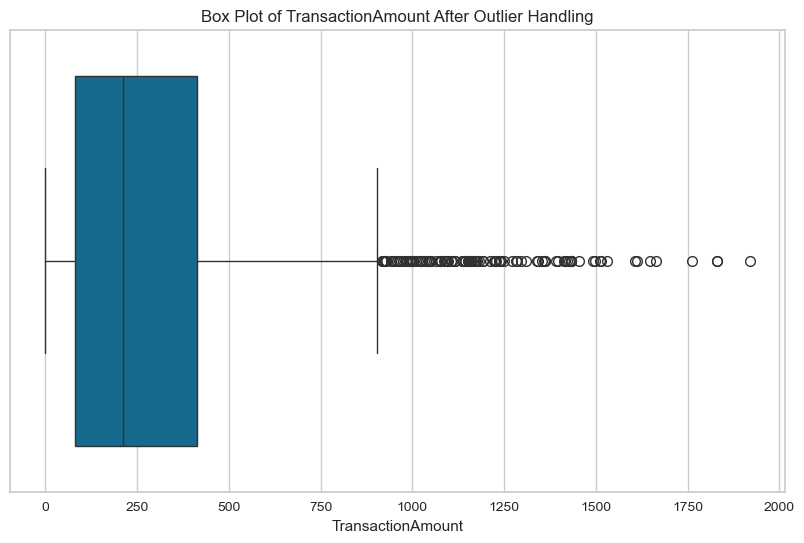

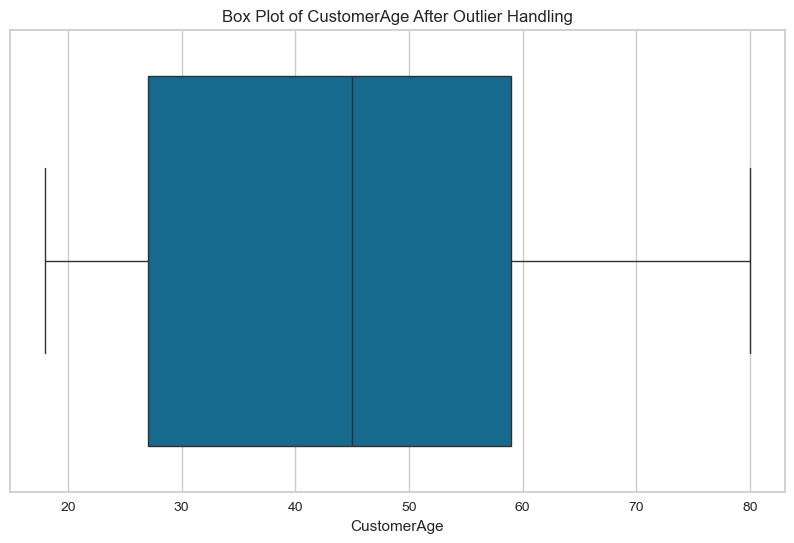

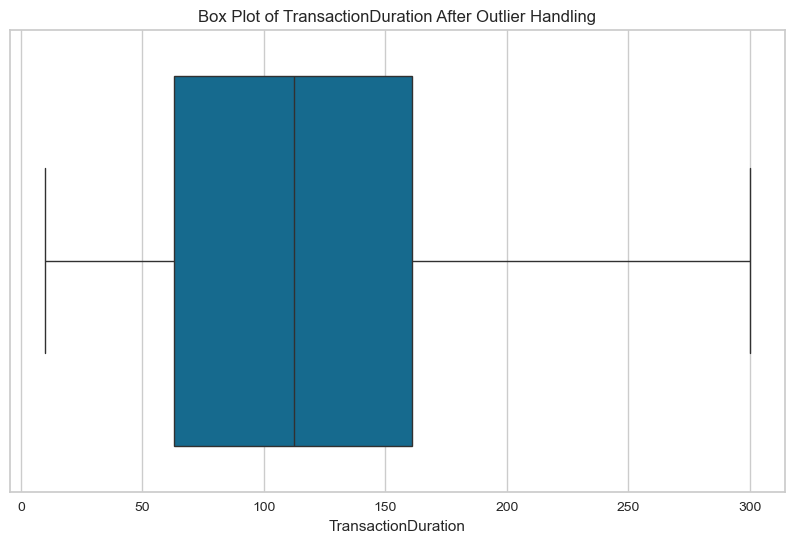

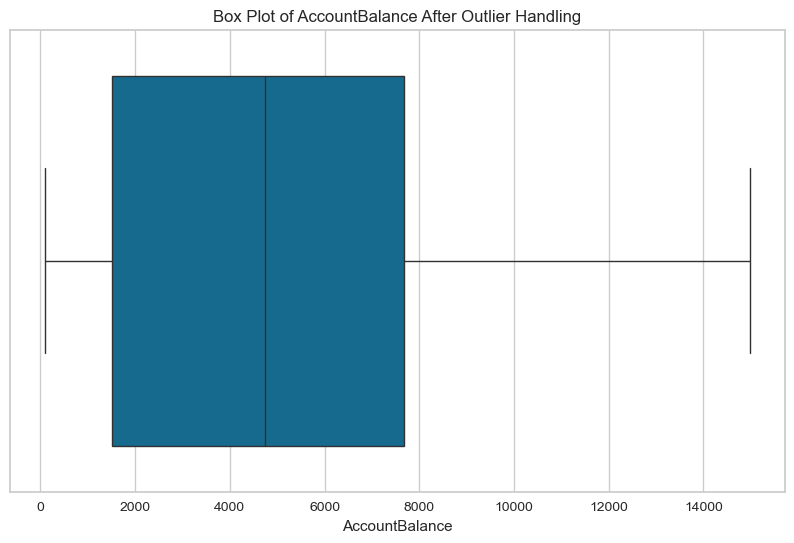

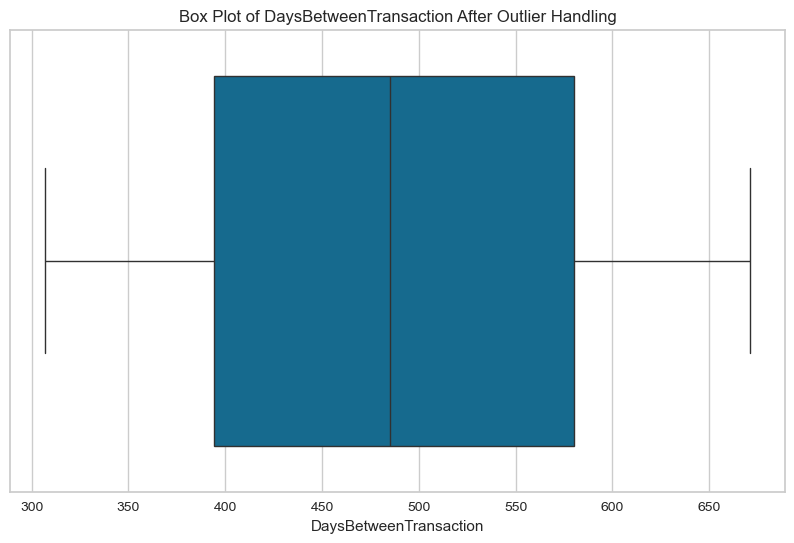

In [20]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_preprocessed[feature])
    plt.title(f'Box Plot of {feature} After Outlier Handling')
    plt.show()

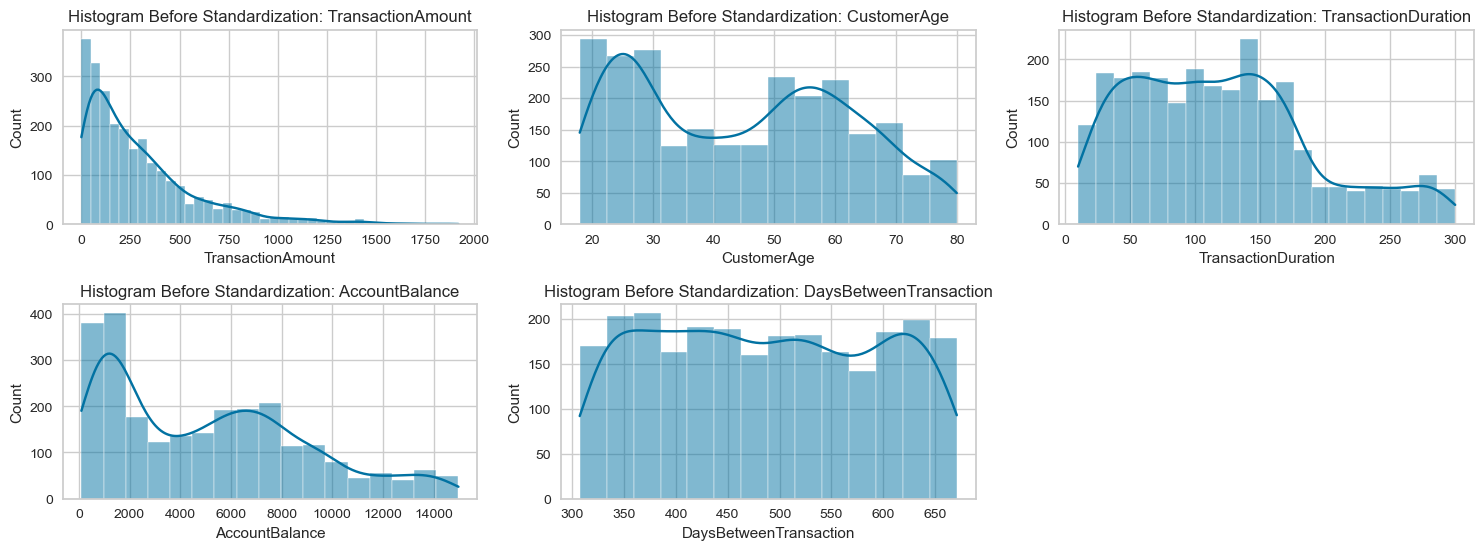

In [21]:
#  Show Histogram before Standardization 
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)  
    sns.histplot(df_preprocessed[feature], kde=True)
    plt.title(f"Histogram Before Standardization: {feature}")
plt.tight_layout()
plt.show()

In [22]:
# Standardization Numerical Data 
scaler = StandardScaler()
df_preprocessed[numeric_features] = scaler.fit_transform(df_preprocessed[numeric_features])

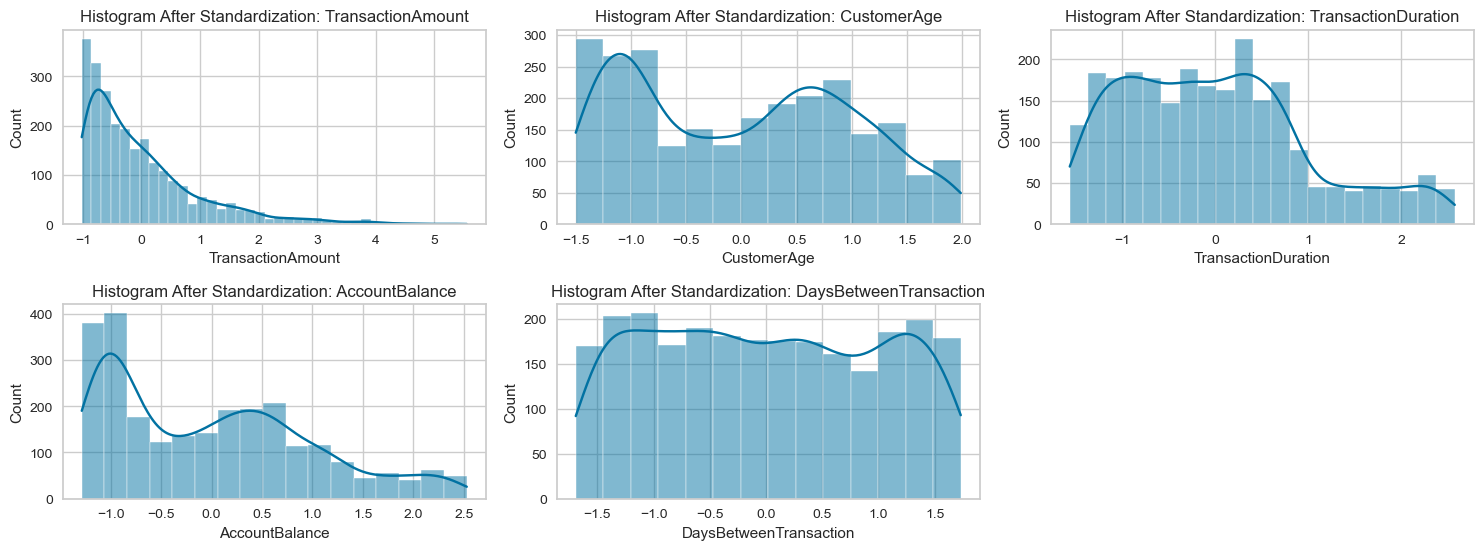

In [23]:
# Show Histogram After Standardization
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_preprocessed[feature], kde=True)
    plt.title(f"Histogram After Standardization: {feature}")
plt.tight_layout()
plt.show()

In [24]:
# Get all categorical features 
categorical_features = df_preprocessed.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['TransactionType', 'Location', 'Channel', 'CustomerOccupation'], dtype='object')


In [25]:
print("Data Before Label Encoding:")
print(df_preprocessed[categorical_features].head())

Data Before Label Encoding:
  TransactionType   Location Channel CustomerOccupation
0           Debit  San Diego     ATM             Doctor
1           Debit    Houston     ATM             Doctor
2           Debit       Mesa  Online            Student
3           Debit    Raleigh  Online            Student
4          Credit    Atlanta  Online            Student


In [26]:
# Label Encoding for Categorical Data
label_encoders = {}
df_lencoder = df_preprocessed.copy()

for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    df_lencoder[col] = label_encoders[col].fit_transform(df_preprocessed[col])


print(df_lencoder.head())


   TransactionAmount     TransactionDate  TransactionType  Location  Channel  \
0          -0.971275 2023-04-11 16:29:14                1        36        0   
1           0.269440 2023-06-27 16:44:19                1        15        0   
2          -0.586882 2023-07-10 18:16:08                1        23        2   
3          -0.387456 2023-05-05 16:32:11                1        33        2   
4          -0.973468 2023-10-16 17:51:24                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  AccountBalance  \
0     1.423718                   0            -0.552443       -0.000537   
1     1.311287                   0             0.305314        2.216472   
2    -1.443277                   3            -0.909842       -1.023534   
3    -1.049768                   3            -1.353017        0.885797   
4    -1.049768                   3             1.120184        0.593589   

  PreviousTransactionDate  DaysBetweenTransaction  
0     2024-11-04

# **6.  Clustering Model Development**

## **a. Develop Clustering Model**


In this step, I will develop a clustering model using the KMeans algorithm. I will select the features for clustering, initialize the KMeans model, and train the model using the selected features.

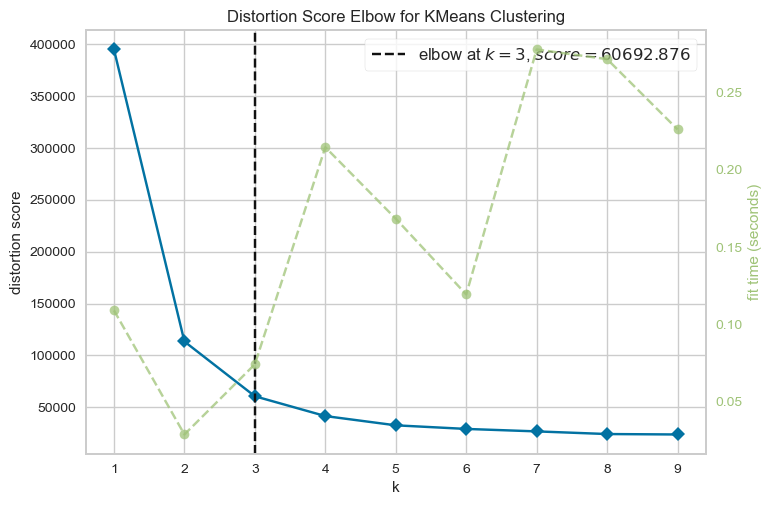

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Select features for clustering
select_features_k_means = df_lencoder[['TransactionAmount', 'AccountBalance', 'CustomerAge', 'CustomerOccupation', 'DaysBetweenTransaction', 'Channel', 'TransactionType', 'Location', 'TransactionDuration']]

# Initialize KMeans Model without params
kmeans = KMeans()

# Initialize Elbow Method to find optimal K
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit the data to the visualizer
visualizer.fit(select_features_k_means)

# Show the result
visualizer.show()

In [28]:
# Initialize KMeans Model with optimal K
model_kmeans = KMeans(n_clusters=3, random_state=0)
model_kmeans.fit(select_features_k_means)

# Get the cluster labels
cluster_labels = model_kmeans.labels_

# Get n cluster
k = 3

# Function to analyze characteristics of each cluster
def analyze_cluster(X, cluster_labels, k):
    print("Analysis of Cluster Characteristics:")
    for cluster_id in range(k):
        cluster_data = X[cluster_labels == cluster_id]
        
        # Calculate the average value of each nominal features in the cluster
        mean_transaction_amount = cluster_data['TransactionAmount'].mean()
        mean_account_balance = cluster_data['AccountBalance'].mean()
        mean_customer_age = cluster_data['CustomerAge'].mean()
        mean_days_between_transaction = cluster_data['DaysBetweenTransaction'].mean()
        
        # Calculate the mode of each categorical features in the cluster
        mode_channel = cluster_data['Channel'].mode().values[0]
        mode_customer_occupation = cluster_data['CustomerOccupation'].mode().values[0]
        
        
        # Print the average value of each feature in the cluster
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Average Transaction Amount: {mean_transaction_amount}")
        print(f"Average Account Balance: {mean_account_balance}")
        print(f"Average Customer Age: {mean_customer_age}")
        print(f"Average Days Between Transaction: {mean_days_between_transaction}")
        print(f"Mode Channel: {mode_channel}")
        print(f"Mode Customer Occupation: {mode_customer_occupation}")
        
        
# Analyze the characteristics of each cluster
analyze_cluster(select_features_k_means, cluster_labels, k)

Analysis of Cluster Characteristics:

Cluster 1:
Average Transaction Amount: 0.020872609056587745
Average Account Balance: 0.006464093231016509
Average Customer Age: -0.02859850148684088
Average Days Between Transaction: -0.009700299872505145
Mode Channel: 1
Mode Customer Occupation: 3

Cluster 2:
Average Transaction Amount: -0.001337558076322205
Average Account Balance: 0.010033792511952298
Average Customer Age: 0.02582366845020713
Average Days Between Transaction: -0.01649603417045172
Mode Channel: 1
Mode Customer Occupation: 3

Cluster 3:
Average Transaction Amount: -0.021858185153424046
Average Account Balance: -0.015857245429103193
Average Customer Age: 0.009080955118146123
Average Days Between Transaction: 0.025047650410008584
Mode Channel: 1
Mode Customer Occupation: 1


## **b. Evaluation Clustering Model**

In this step, I will optimize the model using the Elbow Method to find the optimal number of clusters (K). I want also evaluate the clustering model using the Silhouette Score. The Silhouette Score is a metric used to calculate the goodness of a clustering technique. It measures how similar an object is to its cluster compared to other clusters. The value of the Silhouette Score ranges from -1 to 1, where a high value indicates that the object is well-matched to its cluster and poorly matched to neighboring clusters.

In [29]:
# Evaluate the model using Silhouette Score
silhouette_avg = silhouette_score(select_features_k_means, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4894259923162318


## **c. Feature Selection**

In this step, I will perform feature selection using the Recursive Feature Elimination (RFE) method. RFE is a technique used to select the most important features for a model. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

Selected Features: Index(['AccountBalance', 'CustomerAge', 'Channel', 'TransactionType',
       'Location'],
      dtype='object')


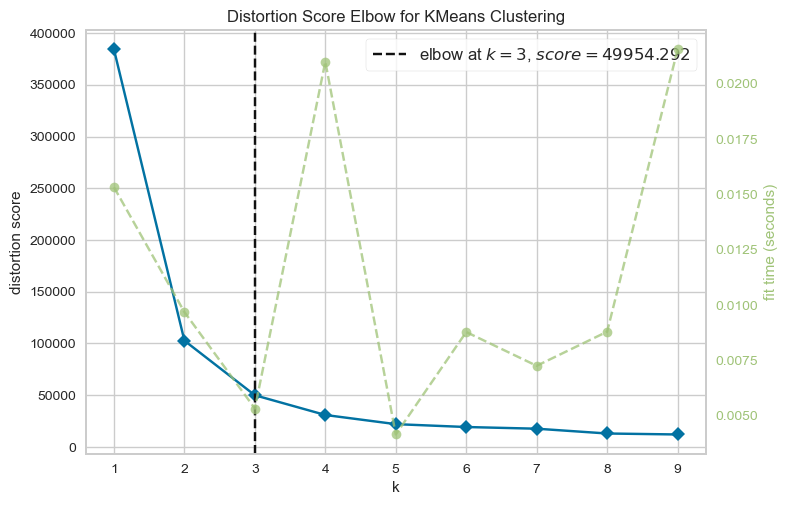

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Initialize the model for RFE
model_rfe = LogisticRegression(max_iter=500)
# Initialize RFE with the model and number of features to selec
rfe_selector = RFE(model_rfe, n_features_to_select=5)

# Fit RFE
rfe_selector.fit(select_features_k_means, cluster_labels)

# Get the selected features
selected_features_from_rfe = select_features_k_means.columns[rfe_selector.get_support(indices=True)]
print("Selected Features:", selected_features_from_rfe)

# Elbow Method to find optimal K after Feature Selection
visualizer_rfe = KElbowVisualizer(kmeans, k=(1, 10))

# Fit the data to the visualizer
visualizer_rfe.fit(select_features_k_means[selected_features_from_rfe])

# Show the result
visualizer_rfe.show()


In [31]:
# Copy df based on selected features from rfe 
k_means_rfe = select_features_k_means[selected_features_from_rfe]

# Rebuild the model with selected features
model_kmeans_rfe = KMeans(n_clusters=3, random_state=0)
model_kmeans_rfe.fit(k_means_rfe)

# Get the cluster labels
cluster_labels_rfe = model_kmeans_rfe.labels_

# Evaluate the model using Silhouette Score
silhouette_avg_rfe = silhouette_score(select_features_k_means[selected_features_from_rfe], cluster_labels_rfe)

print(f"Silhouette Score before Feature Selection: {silhouette_avg}")
print(f"Silhouette Score after Feature Selection: {silhouette_avg_rfe}")

Silhouette Score before Feature Selection: 0.4894259923162318
Silhouette Score after Feature Selection: 0.5359736779725359


## **d. Clustering Result Visualization**

I use 2D PCA projection for visualizing the clustering result. PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. It is often used to visualize genetic distance and relatedness between populations.

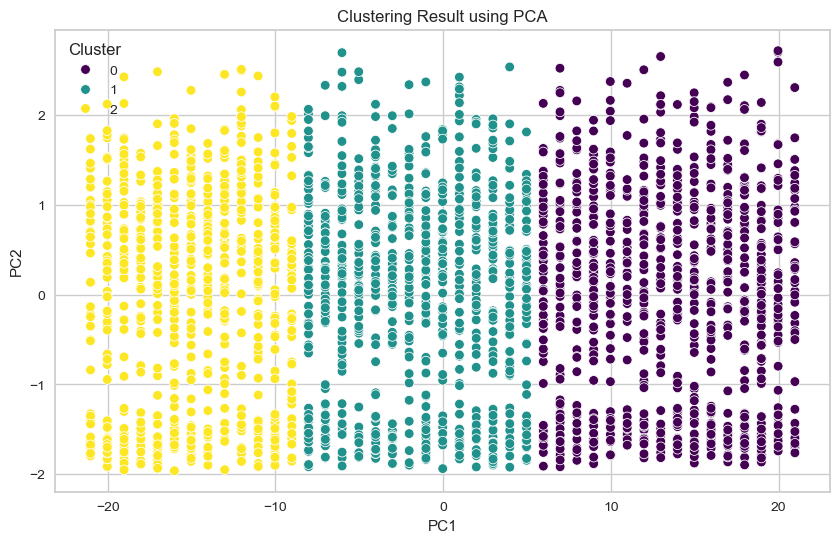

In [32]:
# Visualize the clustering result using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(k_means_rfe)
df_viz = pd.DataFrame(pca_components, columns=["PC1", "PC2"])
df_viz["Cluster"] = cluster_labels_rfe

# Visualize the clustering result using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_viz, x="PC1", y="PC2", hue="Cluster", palette="viridis")
plt.title("Clustering Result using PCA")
plt.show()

## **e. Analysis and Interpretation of Cluster Result*

### Interpretation Target


In [33]:
# Add cluster labels to the original dataframe
df_normalized = k_means_rfe.copy()
df_normalized['Cluster'] = cluster_labels_rfe

print("Data Before Inverse Transform:")
print(df_normalized.head())

# Inverse Transform for Categorical Data
df_normalized['Channel'] = label_encoders['Channel'].inverse_transform(df_normalized['Channel'])
df_normalized['TransactionType'] = label_encoders['TransactionType'].inverse_transform(df_normalized['TransactionType'])
df_normalized['Location'] = label_encoders['Location'].inverse_transform(df_normalized['Location'])

print("\nData After Inverse Transform:")
print(df_normalized.head())


Data Before Inverse Transform:
   AccountBalance  CustomerAge  Channel  TransactionType  Location  Cluster
0       -0.000537     1.423718        0                1        36        0
1        2.216472     1.311287        0                1        15        1
2       -1.023534    -1.443277        2                1        23        1
3        0.885797    -1.049768        2                1        33        0
4        0.593589    -1.049768        2                0         1        2

Data After Inverse Transform:
   AccountBalance  CustomerAge Channel TransactionType   Location  Cluster
0       -0.000537     1.423718     ATM           Debit  San Diego        0
1        2.216472     1.311287     ATM           Debit    Houston        1
2       -1.023534    -1.443277  Online           Debit       Mesa        1
3        0.885797    -1.049768  Online           Debit    Raleigh        0
4        0.593589    -1.049768  Online          Credit    Atlanta        2


### Inverse Data from Standardization

In [34]:
# Show data before inverse transform
print("Data Before Inverse Transform:")
print(df_normalized.head())


# Inverse Transform for Numerical Data in df_lencoder 
df_lencoder[numeric_features] = scaler.inverse_transform(df_lencoder[numeric_features])

# Change value in df_normalized with inverse transform value from selected features
num_features_selected_rfe = [ 'AccountBalance', 'CustomerAge']
df_normalized[num_features_selected_rfe] = df_lencoder[num_features_selected_rfe]


# Show data after inverse transform
print("\nData After Inverse Transform:")
print(df_normalized.head())

Data Before Inverse Transform:
   AccountBalance  CustomerAge Channel TransactionType   Location  Cluster
0       -0.000537     1.423718     ATM           Debit  San Diego        0
1        2.216472     1.311287     ATM           Debit    Houston        1
2       -1.023534    -1.443277  Online           Debit       Mesa        1
3        0.885797    -1.049768  Online           Debit    Raleigh        0
4        0.593589    -1.049768  Online          Credit    Atlanta        2

Data After Inverse Transform:
   AccountBalance  CustomerAge Channel TransactionType   Location  Cluster
0         5112.21         70.0     ATM           Debit  San Diego        0
1        13758.91         68.0     ATM           Debit    Houston        1
2         1122.35         19.0  Online           Debit       Mesa        1
3         8569.06         26.0  Online           Debit    Raleigh        0
4         7429.40         26.0  Online          Credit    Atlanta        2


In [35]:
# Function to analyze characteristics of each cluster
def analyze_character_cluster(X, cluster_labels, k):
      print("Analysis of Cluster Characteristics:")
      for cluster_id in range(k):
        cluster_data = X[cluster_labels == cluster_id]
        
        # Calculate the average value of each nominal features in the cluster
        mean_account_balance = cluster_data['AccountBalance'].mean()
        mean_customer_age = cluster_data['CustomerAge'].mean()
        
        # Calculate the mode of each categorical features in the cluster
        mode_channel = cluster_data['Channel'].mode().values[0]
        mode_transaction_type = cluster_data['TransactionType'].mode().values[0]
        mode_location = cluster_data['Location'].mode().values[0]
        
        # Print the average value of each feature in the cluster
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Average Account Balance: {mean_account_balance}")
        print(f"Average Customer Age: {mean_customer_age}")
        print(f"Mode Channel: {mode_channel}")
        print(f"Mode Transaction Type: {mode_transaction_type}")
        print(f"Mode Location: {mode_location}")
            
analyze_character_cluster(df_normalized, cluster_labels_rfe, k)           

# Calculate statistic description for each cluster
cluster_summary = df_normalized.groupby("Cluster")[num_features_selected_rfe].agg(["mean", "median", "std", "min", "max"])
print("\nStatistic Description for Each Cluster:")
print(cluster_summary)

Analysis of Cluster Characteristics:

Cluster 1:
Average Account Balance: 5139.514002145924
Average Customer Age: 44.16523605150215
Mode Channel: Branch
Mode Transaction Type: Debit
Mode Location: Oklahoma City

Cluster 2:
Average Account Balance: 5052.457076923077
Average Customer Age: 44.83550295857988
Mode Channel: Branch
Mode Transaction Type: Debit
Mode Location: Fort Worth

Cluster 3:
Average Account Balance: 5153.436421768707
Average Customer Age: 45.13333333333333
Mode Channel: Branch
Mode Transaction Type: Debit
Mode Location: Charlotte

Statistic Description for Each Cluster:
        AccountBalance                                          CustomerAge  \
                  mean    median          std     min       max        mean   
Cluster                                                                       
0          5139.514002  4641.615  3948.101975  102.20  14977.99   44.165236   
1          5052.457077  4574.430  3904.394723  101.25  14942.78   44.835503   
2          5

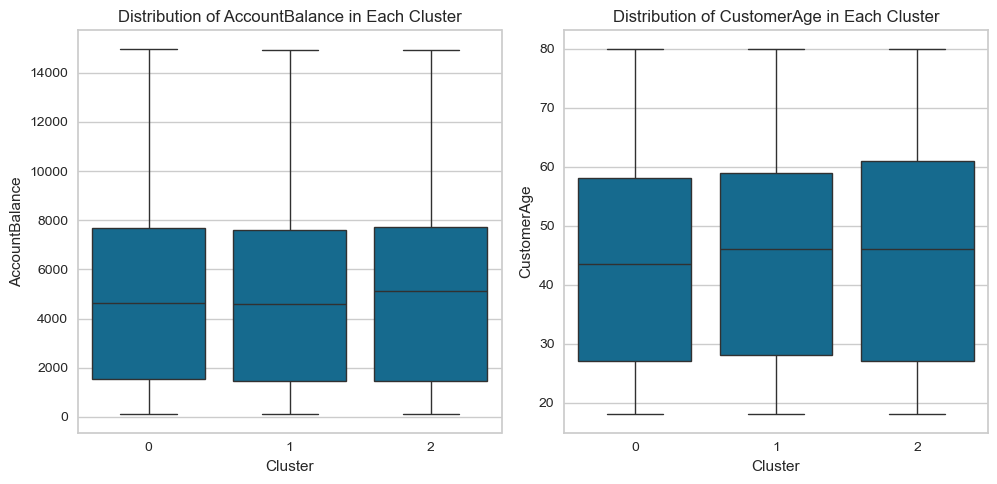

In [36]:
# Visualize numerical features with high correlation in each cluster
selected_numerical_features = ['AccountBalance', 'CustomerAge']

plt.figure(figsize=(15, 5)) 
for i, feature in enumerate(selected_numerical_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_normalized["Cluster"], y=df_normalized[feature])
    plt.title(f'Distribution of {feature} in Each Cluster')
plt.tight_layout()
plt.show()

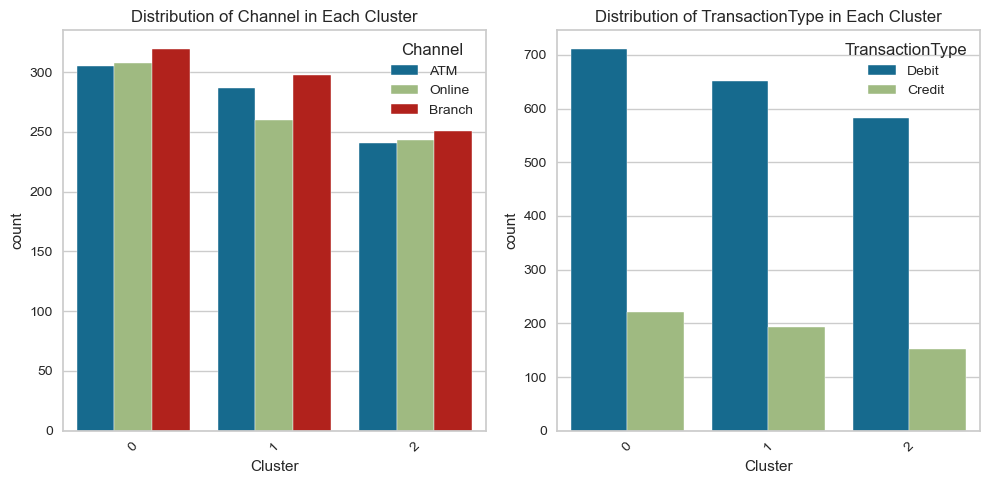

In [37]:
# Visualize categorical features in each cluster
selected_categorical_features = ['Channel', 'TransactionType']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(selected_categorical_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=df_normalized["Cluster"], hue=df_normalized[feature])
    plt.title(f'Distribution of {feature} in Each Cluster')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Analysis Characteristic Cluster from KMeans Model
Below is the analysis of the characteristics of each cluster obtained from the KMeans model.

Cluster 1:
Average Account Balance: 5139.514002145924
Average Customer Age: 44.16523605150215
Mode Channel: Branch
Mode Transaction Type: Debit
Mode Location: Oklahoma City

Cluster 2:
Average Account Balance: 5052.457076923077
Average Customer Age: 44.83550295857988
Mode Channel: Branch
Mode Transaction Type: Debit
Mode Location: Fort Worth

Cluster 3:
Average Account Balance: 5153.436421768707
Average Customer Age: 45.13333333333333
Mode Channel: Branch
Mode Transaction Type: Debit
Mode Location: Charlotte
## Cluster 1:
- **Average Account Balance:** 5139.514002145924
- **Average Customer Age:** 44.16523605150215
- **Mode Channel:** Branch
- **Mode Transaction Type:** Debit
- **Mode Location:** Oklahoma City
- **Analysis**: 
Customer on Cluster 1 has average account balance: 5139 with average age: 44. Oklahoma City is the most location where the customer from this cluster make a transaction. They prefer to use Branch as their channel and Debit as their transaction type. 

## Cluster 2:
- **Average Account Balance:** 5052.457076923077
- **Average Customer Age:** 44.83550295857988
- **Mode Channel:** Branch
- **Mode Transaction Type:** Debit
- **Mode Location:** Fort Worth
- **Analysis**:
Customer on Cluster 2 is similar with Cluster 1, but they have average lower account balance: 5052. Fort Worth is the most location where the customer from this cluster make a transaction. For channel and transaction type, they same like Cluster 1.

## Cluster 3:
- **Average Account Balance:** 5153.436421768707
- **Average Customer Age:** 45.13333333333333
- **Mode Channel:** Branch
- **Mode Transaction Type:** Debit
- **Mode Location:** Charlotte
- **Analysis**:
Cluster 3 has the highest average account balance: 5153. Charlotte is the most location where the customer from this cluster make a transaction. For channel and transaction type, they same like Cluster 1 and 2. But in this cluster, the customer has the highest average age: 45.13.

# Analysis Based on Statistic Description
The statistic description for each cluster shows the following information:
## Account Balance:
- Average account balance in all clusters is relatively similar, ranging from 5052 to 5153.
- Distribution of account balance in each cluster is quite varied, with minimum around 100 and maximum around 14900.
- Standard deviation of account balance is high (around 3800 - 3900), indicating a wide range of account balance values.

## Customer Age:
- Average customer age in all clusters is relatively similar, ranging from 44 to 45.
- Distribution of customer age in each cluster is quite varied, with minimum 18 and maximum  80. It indicates customers from various generations.

# Conclusion and Insights
1. All customers in each cluster prefer to use Branch as their channel and Debit as their transaction type.
2. The average account balance and age in all clusters is relatively similar.
3. Most affected features is Location, where each cluster has a different location as the most location where the customer make a transaction.
4. Debit is still the most transaction type. I recommend the company give more promotion for Credit transaction type. Maybe with cashback or discount.
5. Branch is the most channel used by customers. I recommend the company to improve the online channel / ATM functionality to engage more customers.

# **7. Export Data**

In [38]:
# Export data to CSV
df_normalized.to_csv('bank_transactions_data_clustered.csv', index=False)